### Seattle AirBnB Data

##### Business Questions (Business Understanding)


* What is the most registered types of properties?


* What is the mean price, per day, by property?


* But what makes the property type price?


* How much a ‘good price’ can affect the review?



##### Data Understanding

Using business questions to data understanding:

`1.` What is the most registered types of properties in Seattle?

**To answer this question, we need the available column of the 'property type'. I treated Nan's droping them when all of values was NaN for both axis and get the porportion of each property type**

`2.` What is the mean price, per day, by property?

**To this question will necessary use two availabel columns in listings dataframe, 'property type' and 'price'**


`3.` But what makes the property type price?

**This question will again use the price column. But, for this time I used the amenities column to answer this question** 

`4.` How much a ‘good price’ can affect the review?

**To this question I used the price column and the review scores rating to compare both.**


##### Data Preparation & Results

None of the questions really involve machine learning or predictive models of any kind. I split the data used in parts: preparation, plotting a visualization and analysis.

Import necessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Option to see all table columns
pd.set_option('display.max_columns', 500)

# Seattle Data
df = pd.read_csv("./listings.csv")

**`1.` What is the most registered types of properties in Seattle?**

In [31]:
# Definig the columns that I will be use.
cols = ['id', 'property_type', 'room_type', 'accommodates', \
        'amenities', 'square_feet', 'price', 'number_of_reviews', 'reviews_per_month', 'review_scores_rating', \
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', \
       'review_scores_location', 'review_scores_value']
df = df[cols]

A little Data cleaning

In [32]:
df.isnull().sum()

id                                0
property_type                     1
room_type                         0
accommodates                      0
amenities                         0
square_feet                    3721
price                             0
number_of_reviews                 0
reviews_per_month               627
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_communication     651
review_scores_location          655
review_scores_value             656
dtype: int64

In [33]:
df = df.dropna(how='all', axis=1)
df = df.dropna(how='all', axis=0)

In [34]:
df.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In the plot below, for Seattle we can see that most Homes are available for rent. Almost  1,740 of the registers of porperty type is House. 
Which, in proportion, represents more than 40% of the data. 

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64


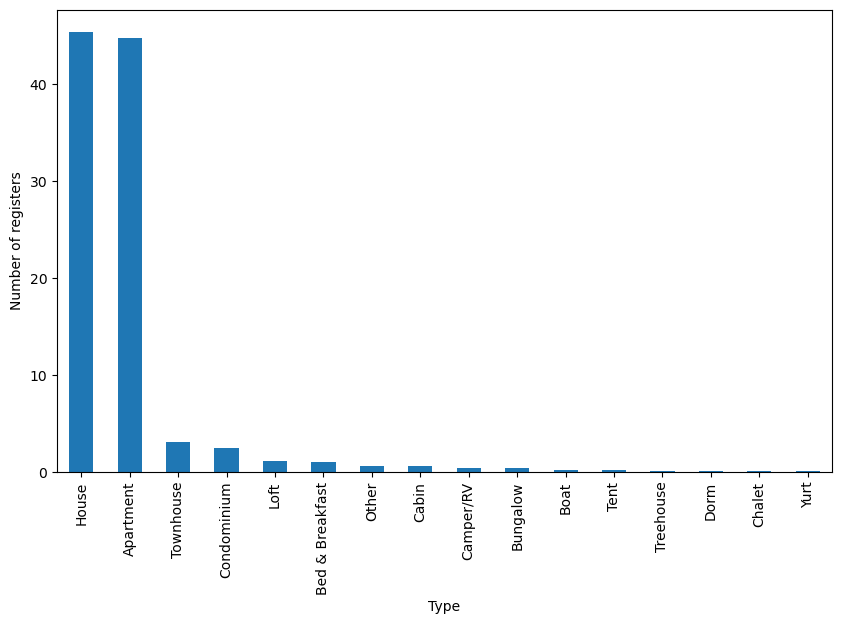

In [35]:
print(df['property_type'].value_counts())
(df['property_type'].value_counts() / df['property_type'].value_counts().sum() * 100).plot(kind='bar', figsize=(10,6))
plt.ylabel('Number of registers')
plt.xlabel('Type');

In [36]:
# Proportion print
df['property_type'].value_counts() / df['property_type'].value_counts().sum() * 100

House              45.402148
Apartment          44.747184
Townhouse           3.091433
Condominium         2.384071
Loft                1.047943
Bed & Breakfast     0.969348
Other               0.576369
Cabin               0.550170
Camper/RV           0.340582
Bungalow            0.340582
Boat                0.209589
Tent                0.130993
Treehouse           0.078596
Dorm                0.052397
Chalet              0.052397
Yurt                0.026199
Name: property_type, dtype: float64

**`2.` What is the mean price, per day, by property?**

For this question, we will need to treat the price column

In [37]:
# Treat signs and type of column
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype('float')

C:\Users\LGuirald\AppData\Local\Temp\ipykernel_30336\3513159226.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


The plot below shows the mean price groped by porperty in Seattle

<AxesSubplot:ylabel='property_type'>

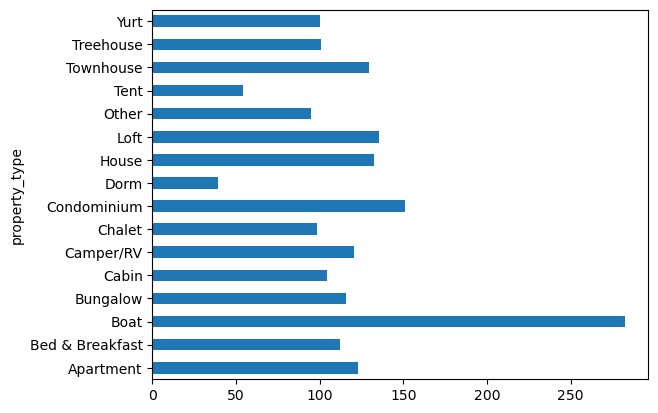

In [38]:
df.groupby('property_type')['price'].mean().plot.barh()

**`3.` But what makes the property type price?**

In [39]:
# count of amentities per property
df['Total_amenities'] = df['amenities'].str.count(',')

The plot below shows the count of amenities compared by price, to find if has some relation

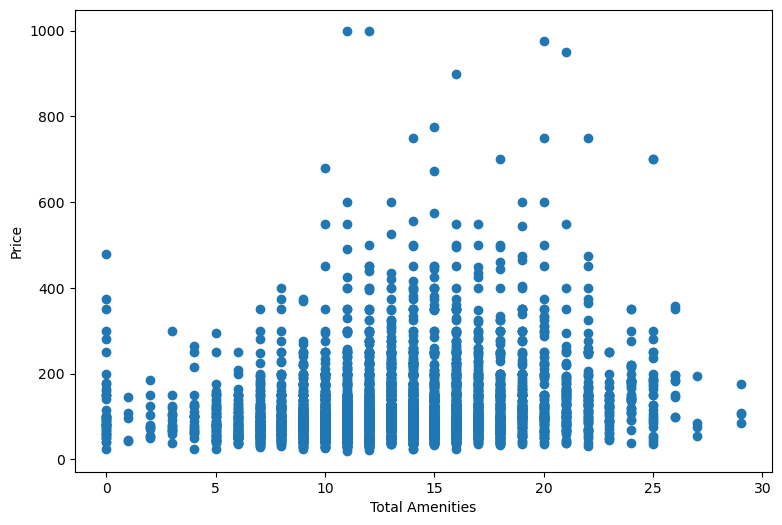

In [40]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(df['Total_amenities'], df['price'])
ax.set_xlabel('Total Amenities')
ax.set_ylabel('Price')
plt.show()

**`4.` How much a ‘good price’ can affect the review?**

The plot below is used to find if has some relation between a good review and the price of rent

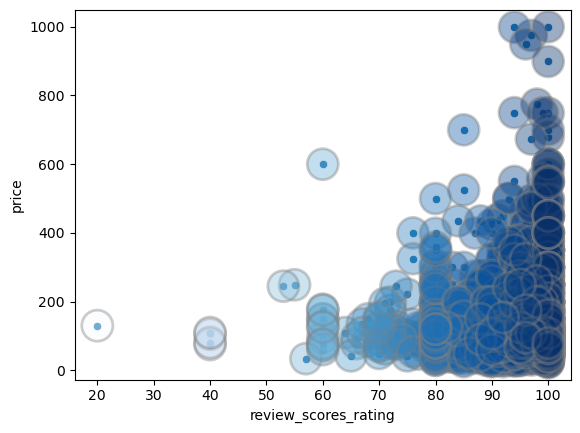

In [41]:
sns.scatterplot(data=df, x='review_scores_rating', y='price', legend=False, sizes=(20, 2000))
plt.scatter(df['review_scores_rating'], df['price'], s=500 , c=df['review_scores_rating'], cmap='Blues', alpha=0.4, edgecolors='grey', linewidth=2)

## Other codes that helped in the process

How amentities can affect the price

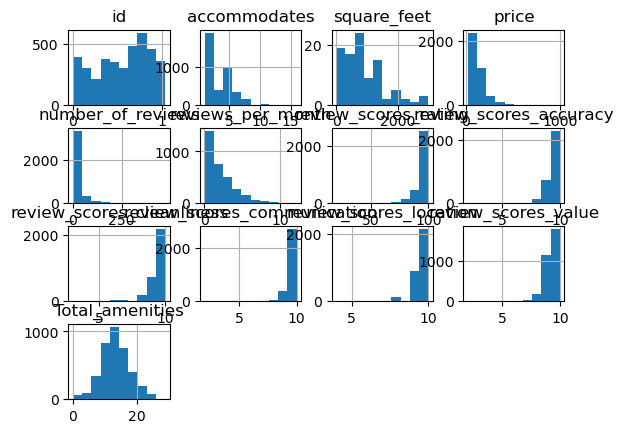

In [42]:
df.hist();

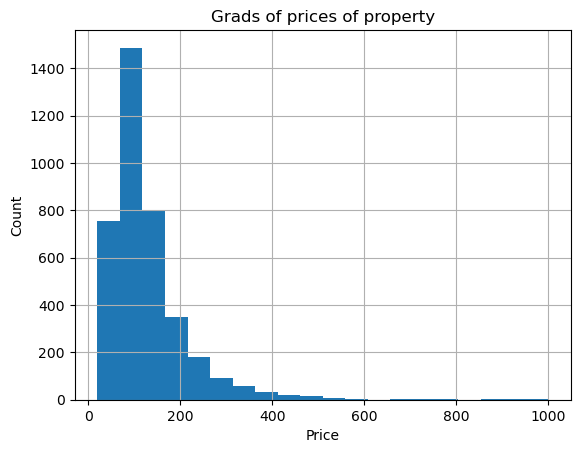

In [43]:
df['price'].hist(bins=20);
plt.title('Grads of prices of property');
plt.xlabel('Price');
plt.ylabel('Count');

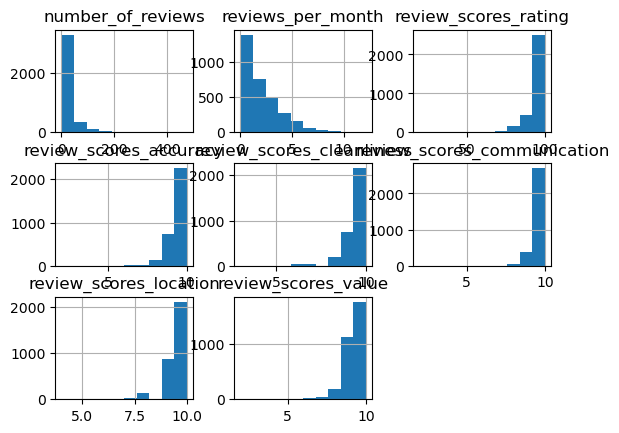

In [44]:
review = ['number_of_reviews', 'reviews_per_month', 'review_scores_rating', \
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', \
       'review_scores_location', 'review_scores_value']
df1 = df[review]
df1.hist();

In [45]:
df.shape

(3818, 16)